In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad
from matplotlib.colors import ListedColormap


/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "supp"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'

adata_5k=sc.read_h5ad(PATH)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]
# adata_5k.obs["Timepoint2"].value_counts()
#adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST




adata_5k



View of AnnData object with n_obs × n_vars = 1418806 × 4993
    obs: 'sample_id', 'barcode', 'GSE', 'Site_status', 'Patient_status', 'Location', 'Age', 'Sex', 'n_genes', 'dataset_id', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'lvl5_annotation', 'Mapping_status', 'scanvi_predictions', 'lvl5_annotation_new', 'lvl5_annotation_new2', 'lvl5_annotation_new3', 'lvl5_annotation_new_archive', 'lvl5_annotation_new_preoprhan', 'lvl5_annotation_new10', 'lvl5_annotation_new11', 'test', 'test_n', 'lvl5_annotation_new12', 'lvl5_annotation_new13', 'lvl4_annotation', 'lvl0', 'temp', 't', 'leiden_res0.1', 'Site_status_simple', 'StatusMilo', 'atlas_status', 'atlas_status_reynolds', 'atlas_status_reynolds_simple', 'atlas_status_simple', 'atlas_status_simple2', 'Site_status_binary', 'scanvi_labels

In [10]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


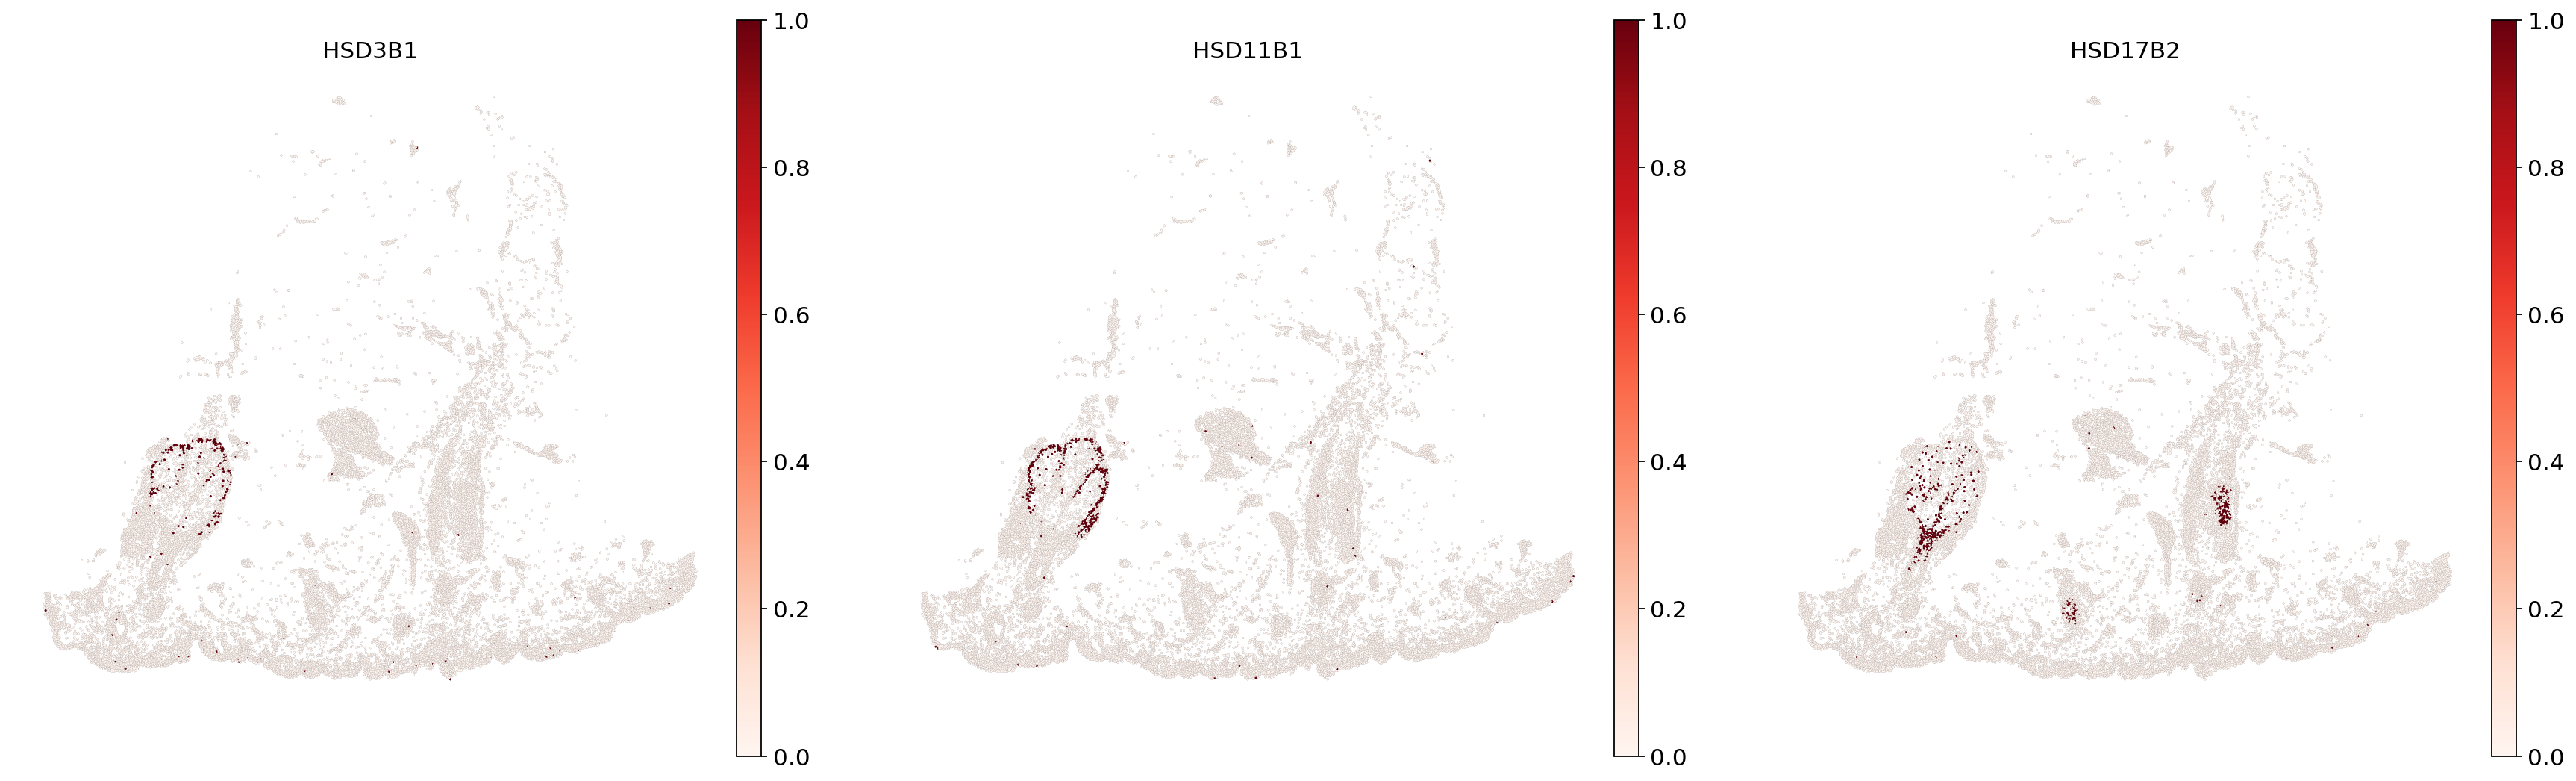

In [13]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


for sec in ["BK49_Past Lesional"]:
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    sq.pl.spatial_scatter(
                    ad_i,
                    library_id="spatial",
                    shape=None,
                    color=["HSD3B1", "HSD11B1", "HSD17B2"] ,
                    size=6,
                    edgecolor="black",
                    linewidth=0.03,
                    vmax=1,
                    #title=STATUS + "\n" + tissue_section_id,
                    save="2b_sebaceous_genes_biochemicalactivity.pdf",
                    cmap="Reds"
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

    
    
    

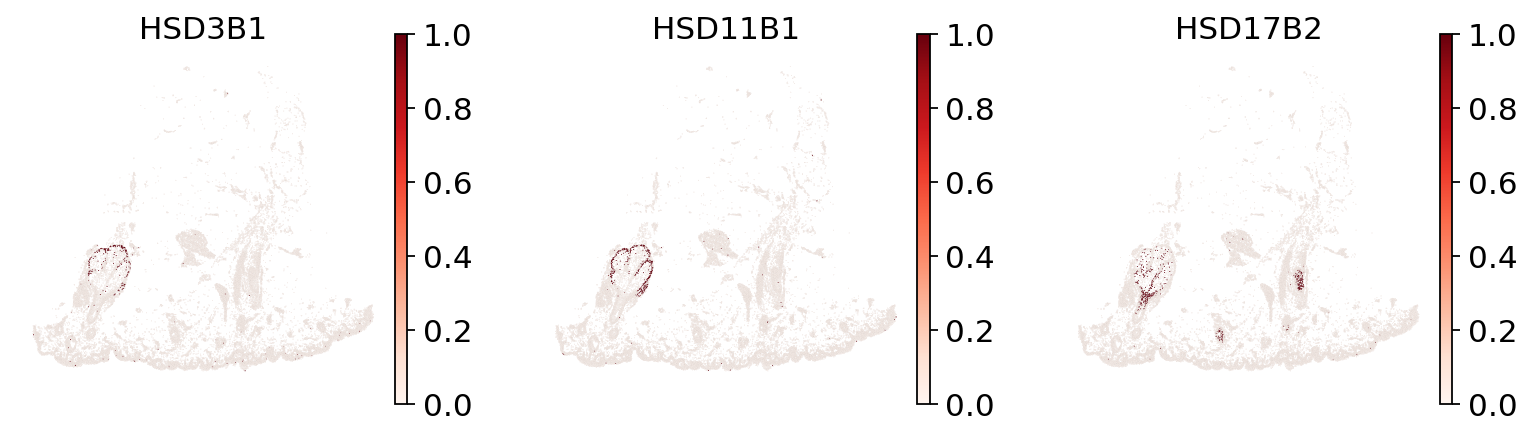

In [16]:
sc.settings.set_figure_params(dpi_save=600, facecolor="white", frameon=False, figsize=(3,3))

for sec in ["BK49_Past Lesional"]:
    ad_i = adata_5k[adata_5k.obs["info_id6"] == sec]
    sq.pl.spatial_scatter(
                    ad_i,
                    library_id="spatial",
                    shape=None,
                    color=["HSD3B1", "HSD11B1", "HSD17B2"] ,
                    size=0.5,
                    edgecolor="black",
                    linewidth=0.005,
                    vmax=1,
                    #title=STATUS + "\n" + tissue_section_id,
                    save="2b_sebaceous_genes_biochemicalactivity_LEGEND.pdf",
                    cmap="Reds"
                   # palette=cmap,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

    
    